# Regresja logistyczna

Na dzisiejszych zajęciach zajmiemy się problemem klasyfikacji danych. Wykorzystamy do tego regresję logistyczną.

## Wprowadzenie

Kiedy chcemy zdecydować jak zaklasyfikować jakieś obiekty o konkretnych cechach możemy np. określić 2 lub więcej klas obiektów i obiekty przypisać do tych klas. Natomiast jeśli algorytmy mają to zrobić za nas, przypiszą obiekt do jakiejś klasy na podstawie wyliczonego prawdopodobieństwa należenia do klasy. To znaczy, że jeśli mamy dwie klasy: A i B, to algorytm może np. wyliczyć, że obiekt można zaklasyfikować jako A z prawdopodobieństwem 0.8 a jako B z prawdopodobieństwem 0.2 to oczywiście algorytm przypisze obiektowi klasę A, dlatego że prawdopodobieństwo jest wyższe, choć nie jest równe 1 - nie mamy pewności, że obiekt rzeczywiście należy do klasy A.

## Regresja logistyczna jako klasyfikator

Wiemy już, że będzie nam potrzebne prawdopodobieństwo i wiemy jak ocenić poprawność działania naszego algorytmu. Ale skąd wziąć prawdopodobieństwo?

Przypomnijmy sobie najpierw jak działała regresja liniowa, którą znamy z poprzednich zajęć. Na podstawie jakiejś cechy lub zestawu cech (zmiennych niezależnych) funkcja ta przybliżała nam wartość zmiennej zależnej od tych cech. Np. procentowy wynik na teście końcowym w kursie względem rozwiązanej liczby ćwiczeń, liczby wejść do kursu, czasu spędzonego w kursie, itp. Załóżmy, że zamiast konkretnego wyniku chcemy przypisać danemu uczniowi etykietę "zda" (wartość = 1) lub "nie zda" (wartość = 0). Co by było, gdybyśmy zastosowali tutaj regresję liniową? Mogłoby to na wykresie wyglądać mniej więcej tak:

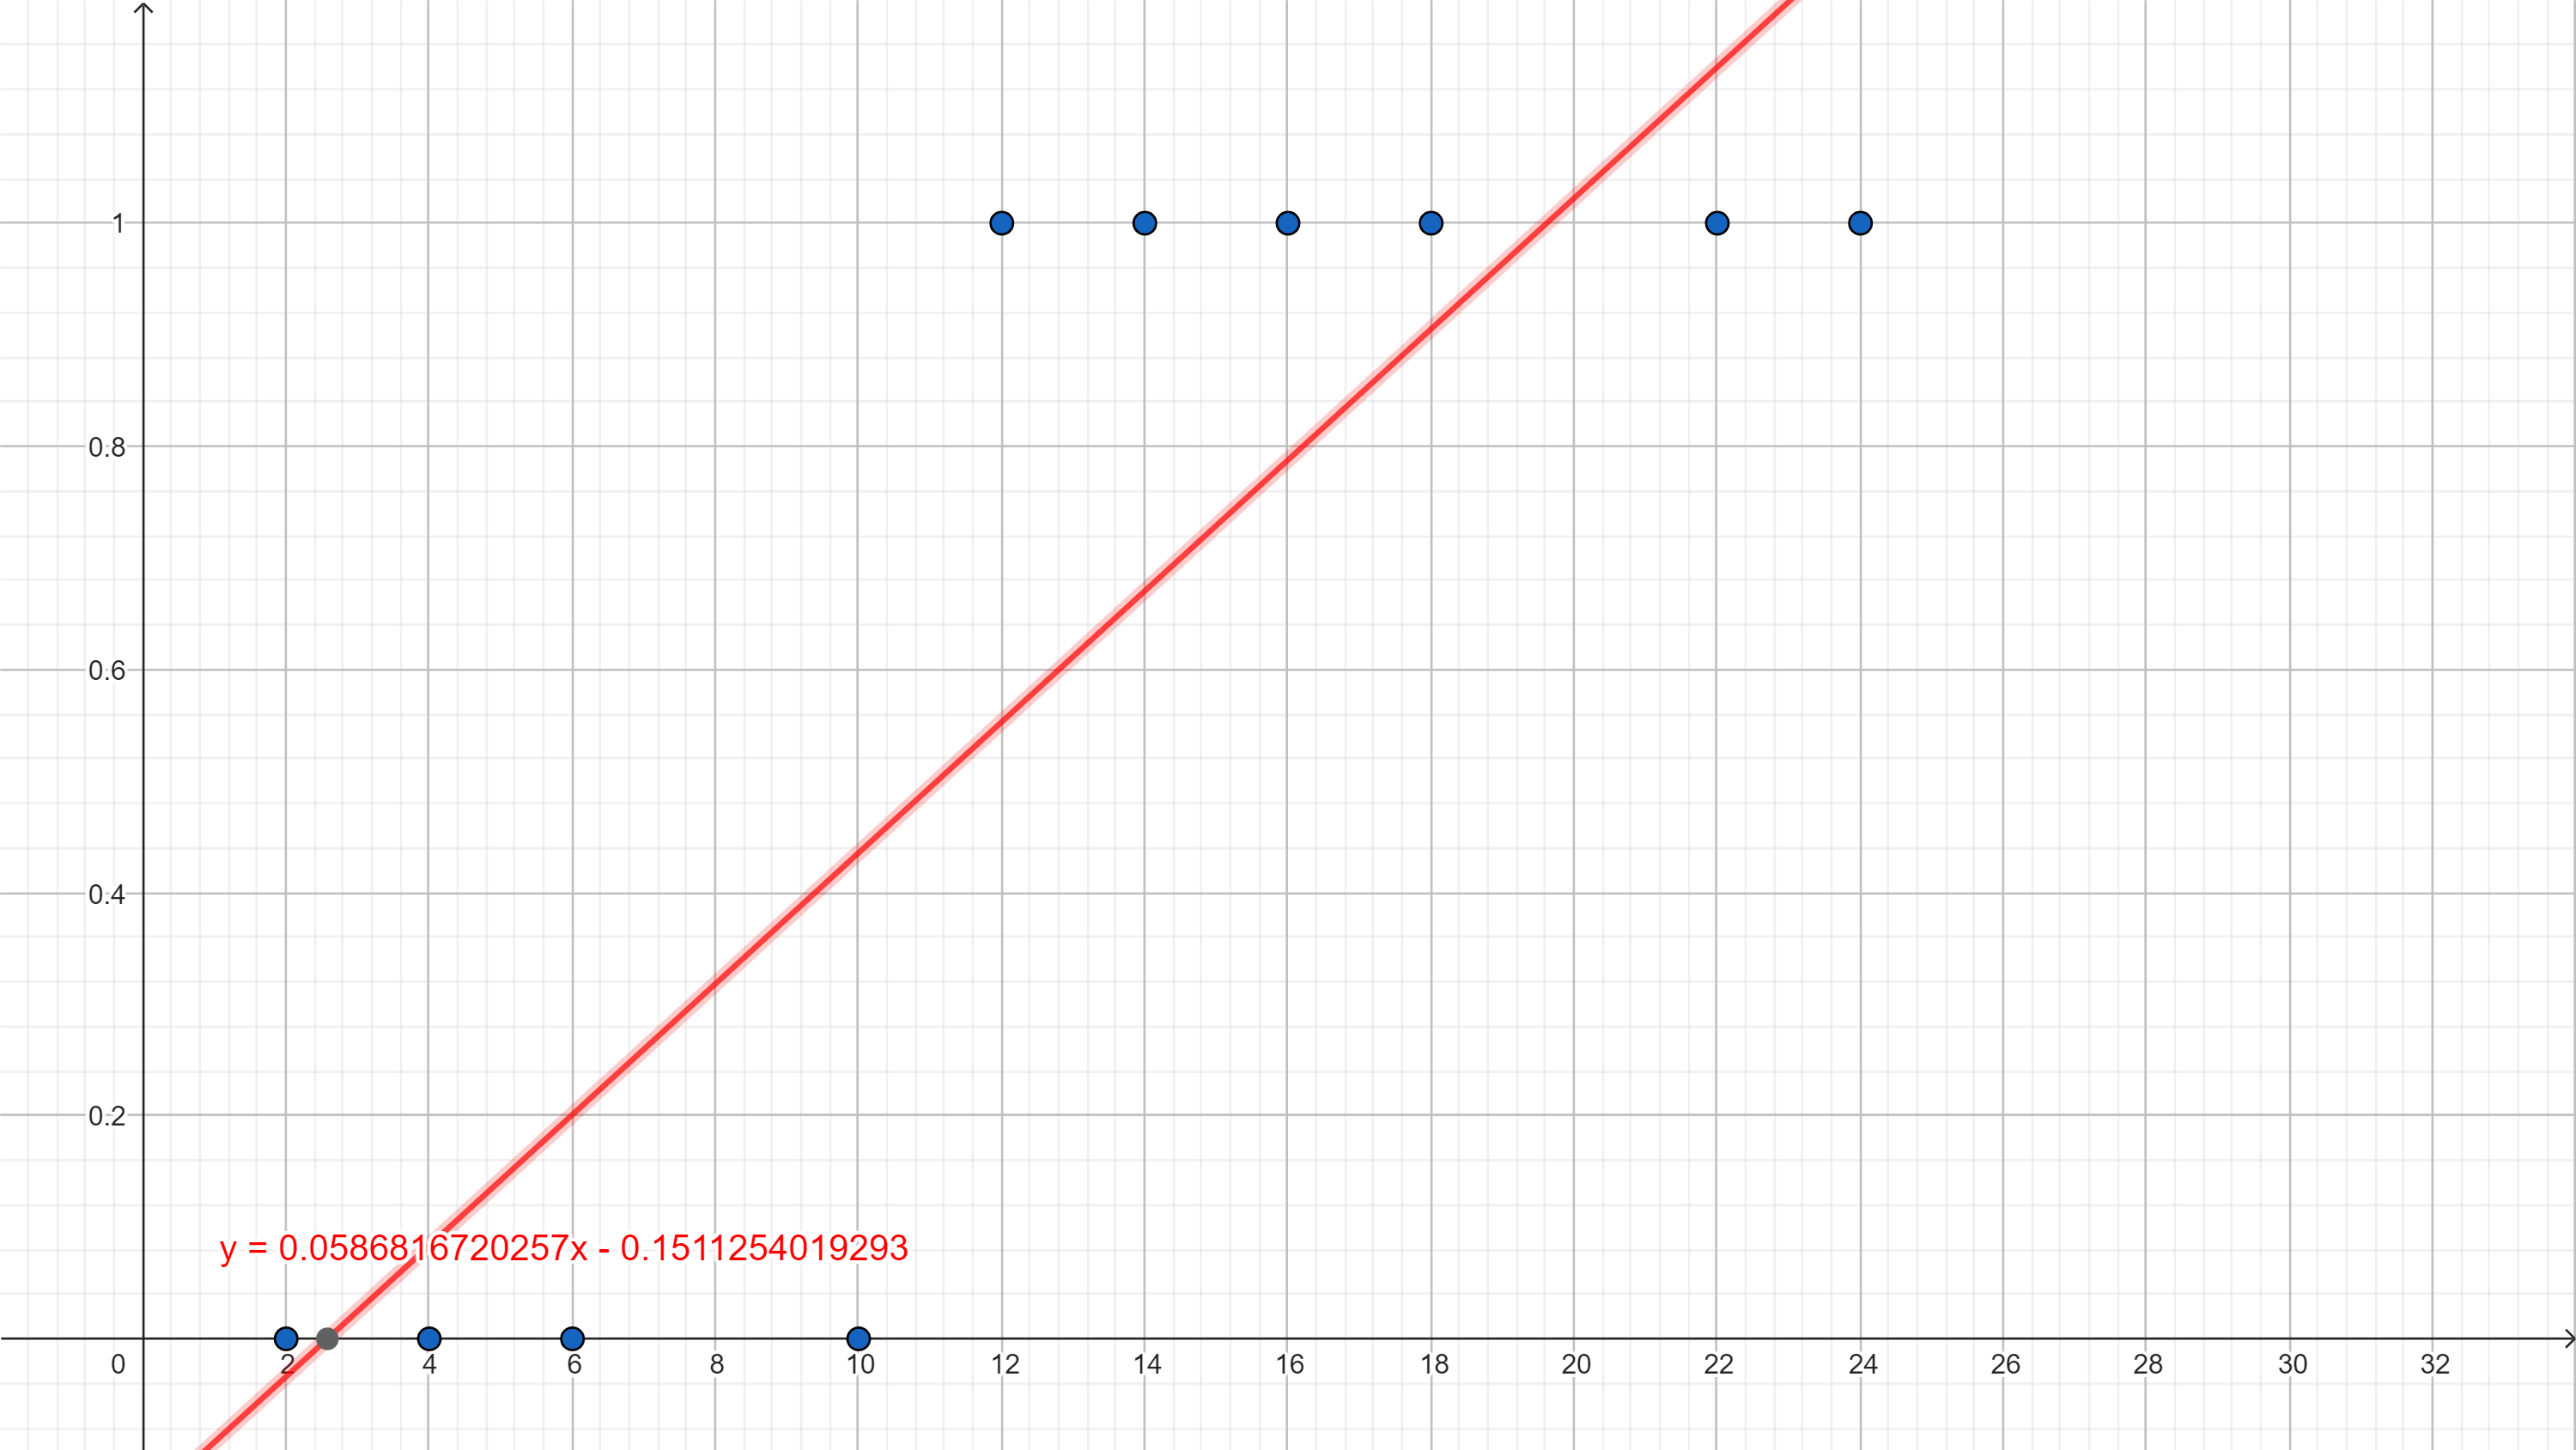

In [1]:
from IPython.display import Image
Image(filename='regLog1.png')

No cóż, widzimy, że tym razem regresja liniowa nie pomoże nam przy estymowaniu wartości przewidywanej, bo w zbiorze uczącym nie będziemy mieli innych wartości zmiennej zależnej niż 0 i 1. Co teraz?

Może spróbujmy przybliżyć zbiór wartości zmiennej zależnej inną funkcją, np.:

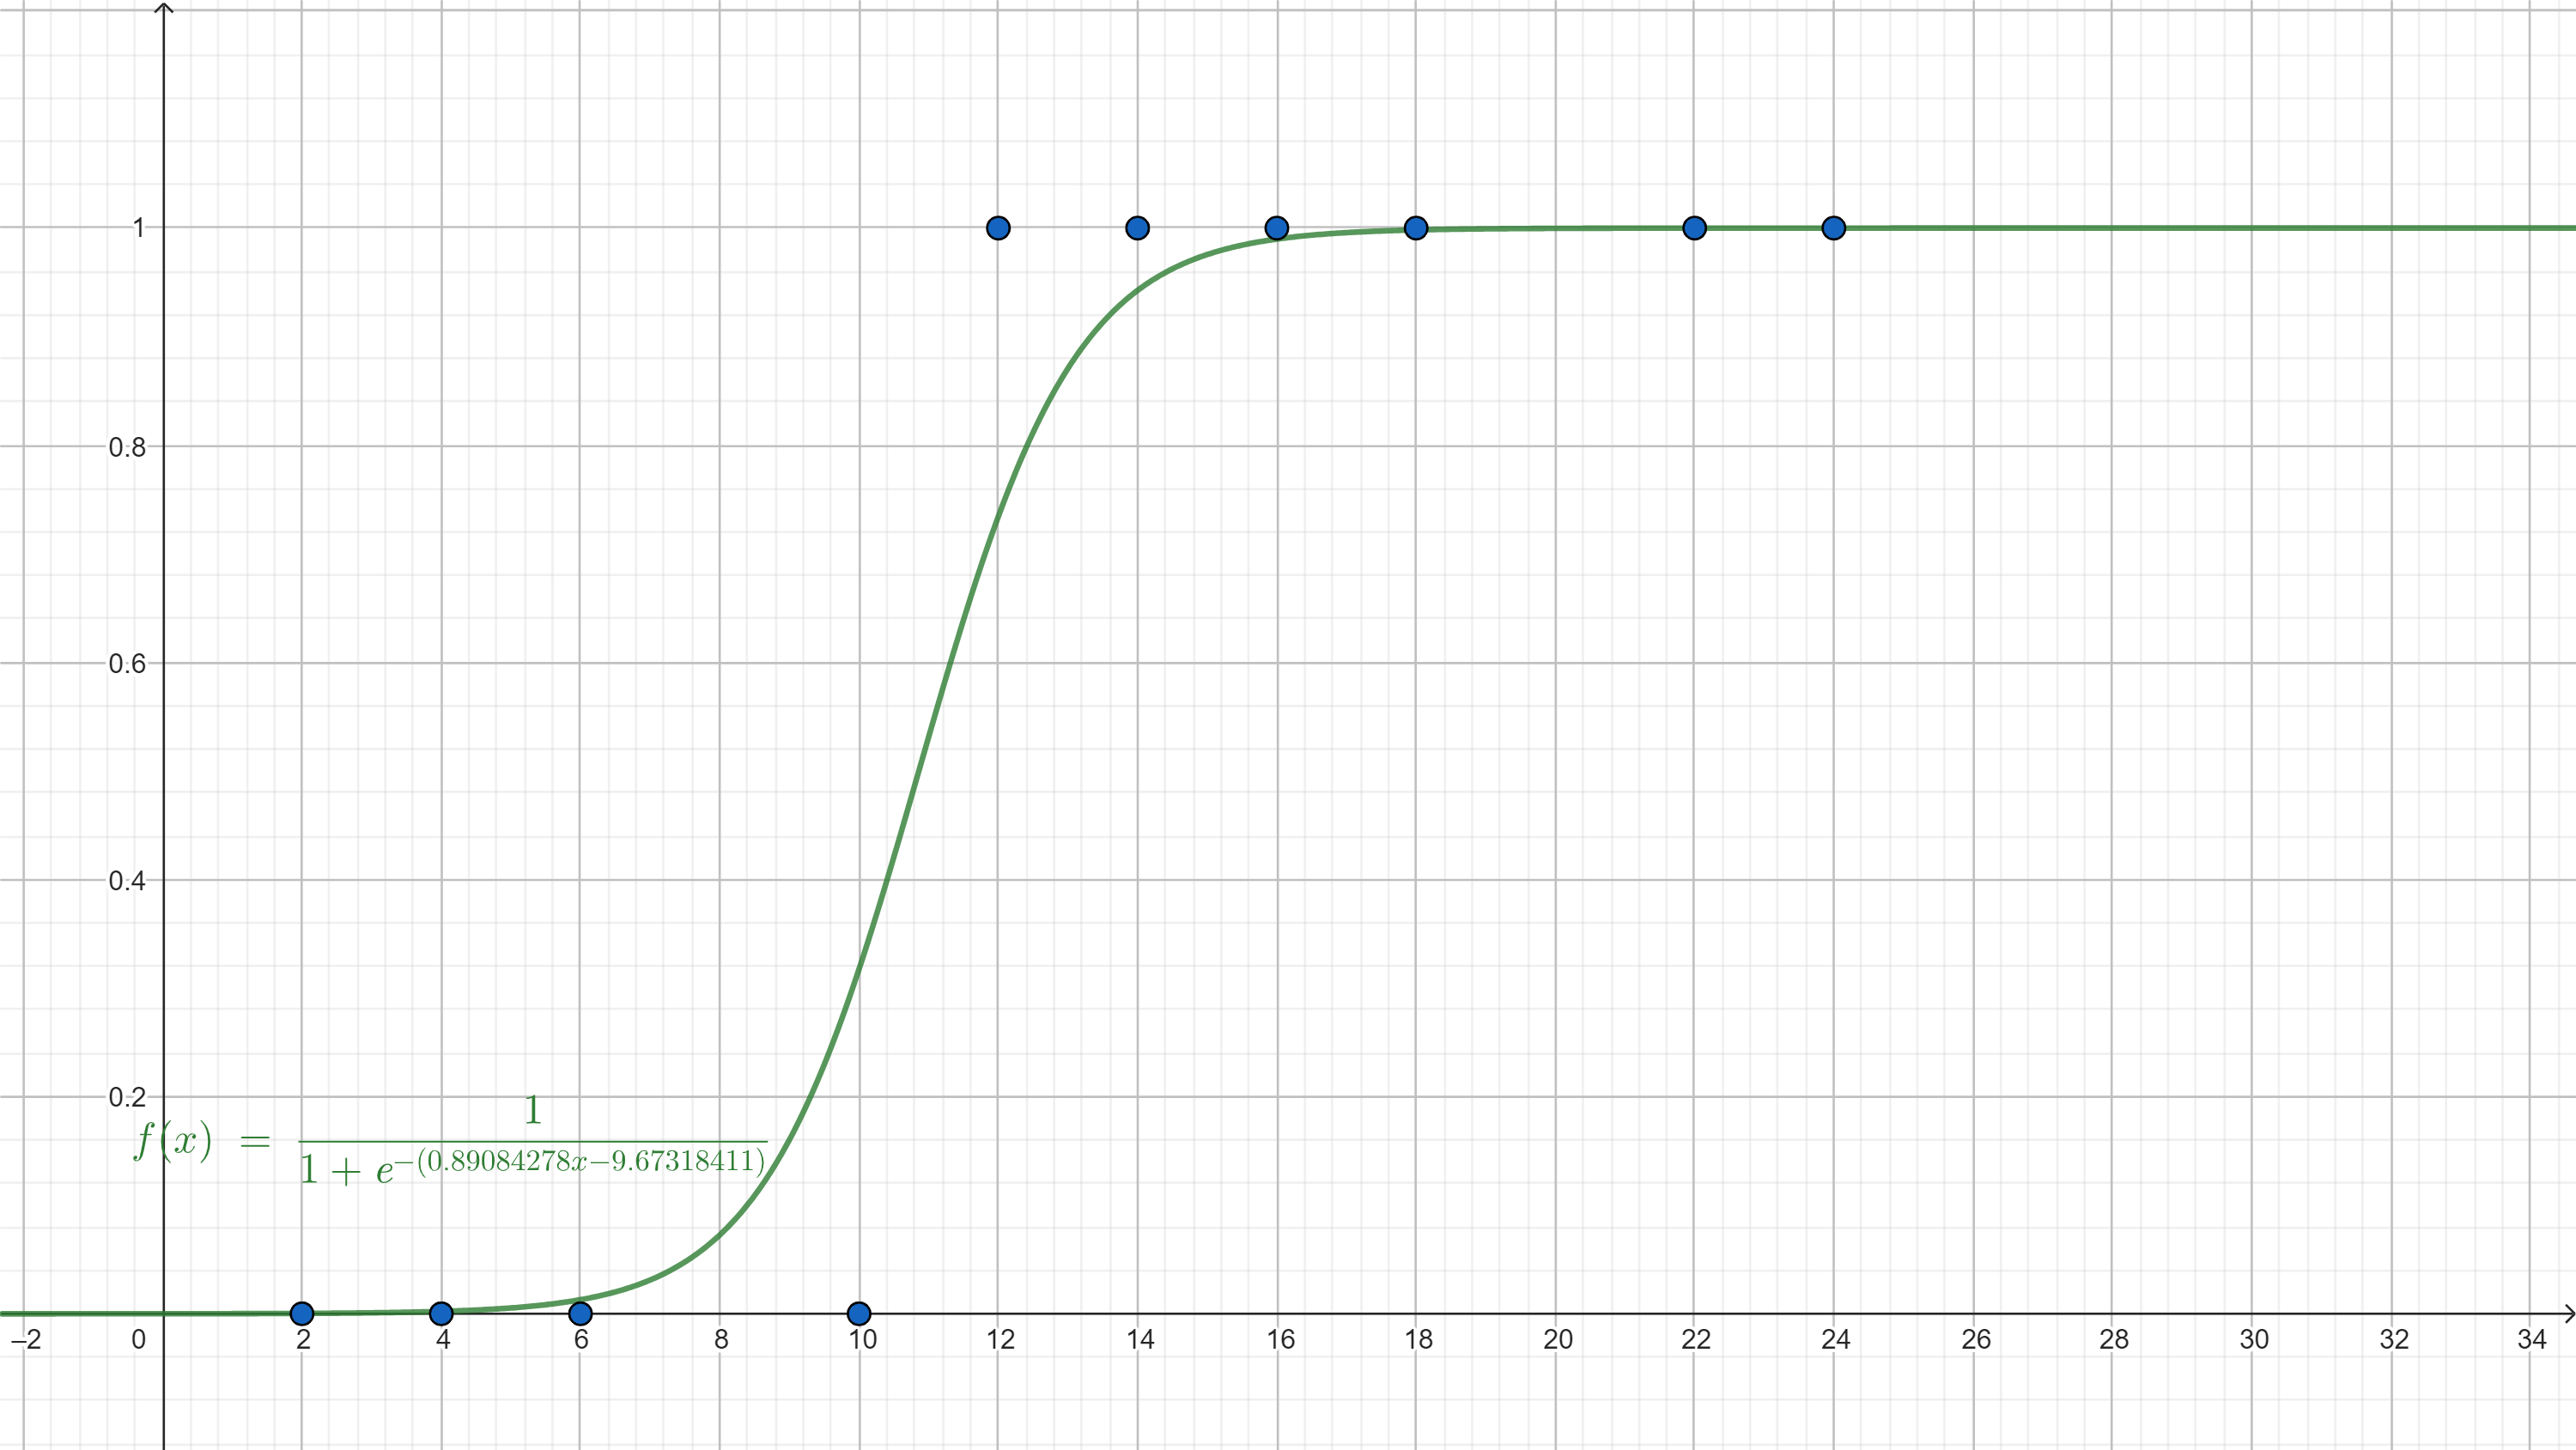

In [2]:
from IPython.display import Image
Image(filename='regLog2.png')

Ta funkcja już lepiej pasuje :)

I o takiej funkcji mówimy, że jest funkcją **regresji logistycznej**. Jest to **funkcja sigmoidalna**. Dla funkcji logistycznej jednej zmiennej wzór w ogólności jest następujący:

$$ f\left ( x \right )=\frac{1}{1+e^{-x}}$$

Natomiast my musimy dopasować tę funkcję do naszego zbioru danych i w tym celu szukamy pewnej funkcji liniowej, która jest argumentem funkcji $e^{-x}$. Na przykład jeśli mamy regresję logistyczną dla jednej zmiennej to szukamy funkcji liniowej $g(x)=ax+b$:

$$ h\left ( x \right )=\frac{1}{1+e^{-\left ( ax + b \right )}}$$

Do znalezienia wartości $a$ i $b$ można wykorzystać np. algorytm gradientu prostego, o którym wspomniano na poprzednich zajęciach. Ale na potrzeby tych zajęć nie będziemy się tym zajmować. Nas interesuje wynik, więc skorzystamy znowu z gotowych bibliotek języka Python, które pozwolą nam wyznaczyć odpowiednią funkcję regresji logistycznej. Dla konkretnego wiersza w naszych danych wyznaczamy wartość takiej funkcji regresji logistycznej, którą potraktujemy jako prawdopodobieństwo należenia do pewnej klasy. I tutaj należy podjąć decyzję, od jakiej wartości prawdopodobieństwa będziemy mówić, że dany obiekt (u nas: _uczeń_) należy do danej klasy lub nie należy (inaczej mówiąc należy do klasy przeciwnej). Na przykład: _jeśli prawdopodobieństwo jest większe niż 0.5, to danemu uczniowi przypisujemy klasę **zda** a w przeciwnym wypadku klasę **nie zda**_.

Zatem przejdźmy do kodu. Na początek importujemy potrzebne biblioteki:

In [3]:
import pandas as pd
import numpy as np
import math
 
from sklearn.linear_model import LogisticRegression

Wczytajmy dane i podejrzyjmy nasz zbiór danych:

In [4]:
data = pd.read_csv('data.csv', sep=';')
data

cwiczenia  czas_min  wejscia  nieodwiedzone  czas_do_testu_godziny  czy_zda
0          2         5        1              4                      5        0
1          4        12        1              1                     20        0
2          6        25        3              3                     36        0
3         10        29        2              0                     22        0
4         12        42        7              1                     37        1
5         14        48        3              1                     33        1
6         16        36        7              1                     47        1
7         22        48        4              0                     45        1
8         24        55        5              0                     39        1

Teraz wykorzystajmy regresję logistyczną:

In [5]:
model = LogisticRegression()
 
X = data[['cwiczenia']]
y = data['czy_zda']

model.fit(X, y)
y_pred = model.predict_proba(X)[:,1]
y_pred

array([3.73769080e-04, 2.21604437e-03, 1.30204590e-02, 3.17614514e-01,
       7.34374026e-01, 9.42600926e-01, 9.89852217e-01, 9.99951084e-01,
       9.99991764e-01])

Dla każdej wartości w kolumnie `cwiczenia` otrzymaliśmy wartość prawdopodobieństwa przynależenia do klasy `zda` (wartość kolumny `czy_zda` wynosi `1`).

A czy tutaj na pewno zastosowano wzór na regresję logistyczną? Sprawdźmy to sami:

In [6]:
a = model.coef_[0][0]
b = model.intercept_[0]

x = data.loc[0, ['cwiczenia']]

print(f'a = {round(a, 8)}; b = {round(b, 8)}')

print(round(1/(1 + math.exp(-(a*x + b))), 8))

print(round(y_pred[0], 8))

a = 0.89084278; b = -9.67318411
0.00037377
0.00037377


Wyniki się zgadzają :)

No dobrze, to teraz podejmijmy decyzję - czy uczeń zda?

In [7]:
def classify(prob, threshold):
    return np.where(prob > threshold, 1, 0)

classify(y_pred, 0.5)

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

Pisząc prostą **funkcję decyzyjną** otrzymujemy tablicę z wartościami `0` (`nie zda`) i `1` (`zda`) dla kolejnych wartości kolumny `cwiczenia` oraz odpowiednich wartości prawdopodobieństwa wyliczonych wcześniej.

Zatem mamy model, na którym możemy testować dopasowanie do odpowiedniej klasy na dowolnej liczby rozwiązanych ćwiczeń. Na przykład sprawdźmy, czy uczeń, który rozwiązał 15 ćwiczeń zda test:

In [8]:
value_to_predict = 15
value_predicted = model.predict_proba([[value_to_predict]])[:,1]
print(value_predicted[0])
classify(value_predicted, 0.5)[0]

0.9756235096862668


1

Powinien zdać :)

A jeśli chcielibyśmy wykorzystać więcej informacji?

In [9]:
XX = data[['cwiczenia', 'czas_min']]
 
model2 = LogisticRegression()
model2.fit(XX, y)
y_pred_XX = model2.predict_proba(XX)[:,1]
print(y_pred_XX)

classify(y_pred_XX, 0.5)

[1.95498874e-08 1.38843757e-06 2.10847410e-03 6.05654169e-02
 9.89910267e-01 9.99760874e-01 9.47668953e-01 9.99984710e-01
 9.99999785e-01]


array([0, 0, 0, 0, 1, 1, 1, 1, 1])

Jak z tego korzystać? Na przykład 15 ćwiczeń i czas w minutach równy 20?

In [10]:
cwiczenia = 15
czas_min = 20

df = pd.DataFrame(list(zip([cwiczenia], [czas_min])))

value_predicted = model2.predict_proba(df)[:,1]
print(value_predicted[0])
classify(value_predicted, 0.5)[0]

0.003612177732919793


0

No tutaj smuteczek :( Ale jakby uczeń spędził więcej czasu?

In [11]:
cwiczenia = 15
czas_min = 32

df = pd.DataFrame(list(zip([cwiczenia], [czas_min])))

value_predicted = model2.predict_proba(df)[:,1]
print(value_predicted[0])
classify(value_predicted, 0.5)[0]

0.6246991012300613


1

To teraz zbudujmy uniwersalny model:

In [12]:
def classifyModel(Xargs, y, value_to_predict_column_list, threshold):
    m = LogisticRegression()
    m.fit(Xargs, y)
    d = pd.DataFrame(list(zip(*value_to_predict_column_list)))
    v = m.predict_proba(d)[:,1]
    c = classify(v, 0.5)[0]
    print("Probability: " + str(v[0]))
    print("Class: " + str(c))
    return c

classifyModel(data[['cwiczenia', 'czas_min', 'wejscia']], y, [[15], [32], [3]], 0.5)

Probability: 0.5132112986552351
Class: 1


1

Zatem mamy teraz funkcję, która dla dowolnego zbioru danych wejściowych i konkretnych wartości, dla których chcemy poznać proponowaną klasę i wybranego przez nas progu prawdopodobieństwa zwróci nam wartość danej klasy jako liczbę.

Na potrzeby tego przedmiotu rozważania na temat problemu klasyfikacji zakończymy na klasyfikacji dwuklasowej (**binarnej**). Nie będziemy się zajmować problemami, gdzie klas jest więcej niż dwie.

## Zadania

Zadania są dostępne na Moodle'u w sekcji **Zajęcia 04**.

In [13]:
## Jeśli chcesz testuj tutaj swój ewentualny kod i naciśnij Shift + Enter. Możesz też edytować kody wyżej.
